## BlackFriday Sales Analysis


## Exploratory Data Analysis & Feature Engineering & Model Building

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_train = pd.read_csv('/Users/alishaalex/Desktop/blackfriday/train.csv')
print(df_train.shape)
df_train.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_test = pd.read_csv('/Users/alishaalex/Desktop/blackfriday/test.csv')
print(df_test.shape)
df_test.head()

(233599, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
#merge test train data
df_merge = pd.concat([df_train, df_test], ignore_index = True)
df_merge.shape

(783667, 12)

In [5]:
df_merge.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [7]:
df_merge.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df_merge.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


The column User_ID doesnot have any impact on the dataset.It is not required for the data analysis (we drop ir columnwise)

In [9]:
df_merge.drop(['User_ID'], axis =1, inplace=True)

Below, we work on Categorical features.
Consider the dataset, most of the features are numerical in nature and most of them are categorical nature.Howerver the columns such as Marital Status is already numerical.
Consider the following columns:
1. Gender : It has F/M in columns. so here we try to change it into numbers F=0 & M=1
2. Age : The column contain range such as 0-17,55+ etc, so lets try to do oridinal encoding by giving a number for  each category.
3. City_Category : the column contain alphabets such A,B etc..Depicting categories.lets try to label them numerically.
4. Stay_In_Current_City_Years : The column contain value 4+ this can be be replaced with 4 as there are no values above this.


In [10]:
df_merge['Gender']=df_merge['Gender'].map({'F':0,'M':1})
df_merge.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df_merge['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df_merge['Age']=df_merge['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [13]:
df_merge.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
df_merge['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df_merge['City_Category']=df_merge['City_Category'].map({'A':1,'B':2,'C':3})
df_merge.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0


In [16]:
df_merge['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df_merge['Stay_In_Current_City_Years']=df_merge['Stay_In_Current_City_Years'].str.replace('+','')

In [18]:
df_merge.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4,0,8,NaN,NaN,7969.0


In [19]:
#missing Values
df_merge.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [20]:

print(df_merge['Product_Category_2'].unique())
print(df_merge['Product_Category_3'].unique())

[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


'Purchase' columns will have null/missing values as we have merged the train and test data.But the columns,Product_Category_2,Product_Category_3 needs to fixed.here these are descreate features as they are getting repeated. So for a discreate feature it is ideal to replace it with Mode.

In [21]:
#'Product_Category_2' column replace missing values
df_merge['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [22]:
#finding mode
df_merge['Product_Category_2'].mode()
df_merge['Product_Category_2'].mode()[0]

8.0

In [23]:
#replacing missing values
df_merge['Product_Category_2'] = df_merge['Product_Category_2'].fillna(df_merge['Product_Category_2'].mode()[0])

In [24]:
df_merge.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [25]:
df_merge['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [26]:
#finding mode
df_merge['Product_Category_3'].mode()
df_merge['Product_Category_3'].mode()[0]

16.0

In [27]:
#replacing missing values
df_merge['Product_Category_3'] = df_merge['Product_Category_3'].fillna(df_merge['Product_Category_3'].mode()[0])

In [28]:
df_merge['Product_Category_3'].isnull().sum()

0

Now consider the types of columns

In [29]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 65.8+ MB


Looking at the info,Stay_In_Current_City_Years is of object type but we have already replaced 4+ with 4 and rest of the values are numerical.so we need to covert it from object type to int type

In [30]:
df_merge['Stay_In_Current_City_Years']=df_merge['Stay_In_Current_City_Years'].astype(int)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 65.8+ MB


Visualisation

In [31]:
df=df_merge.copy()

In [32]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


consider the purchase trend with respect to the age and gender

/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtyp

<Axes: xlabel='Age', ylabel='Purchase'>

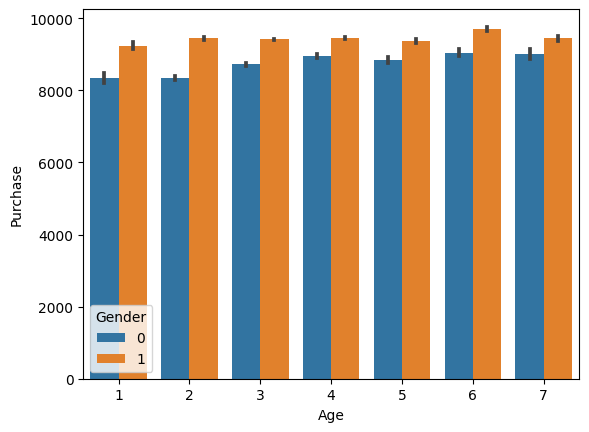

In [33]:
sns.barplot('Age','Purchase',hue='Gender',data=df)

Here, the purchases for male  category is higher than for female category over all the age groups.It shows a uniform distribution accross the ages.

now with respect to occupation lets visualise purchase for each geneder

In [34]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtyp

<Axes: xlabel='Occupation', ylabel='Purchase'>

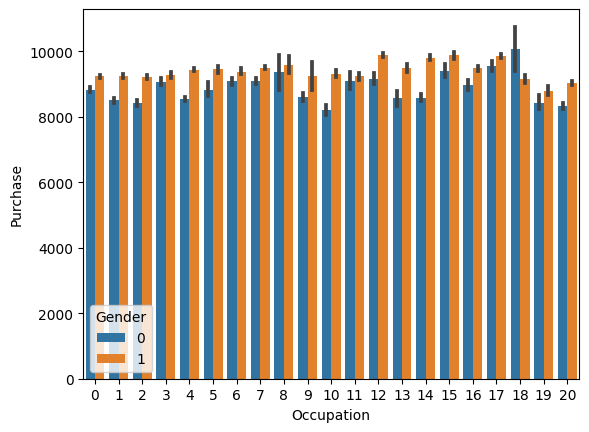

In [35]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

This also shows uniform distribution across the occupation. so both age and occupation does not have much effect on the dataset.

/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtyp

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

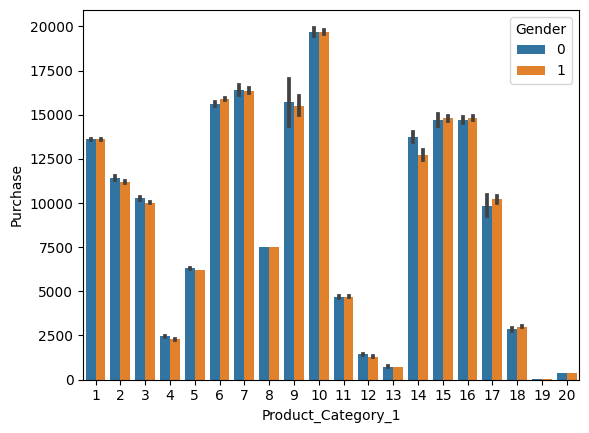

In [36]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

product category 1 shows a strong uneven distribution as some categories have very low purchase percent.

/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtyp

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

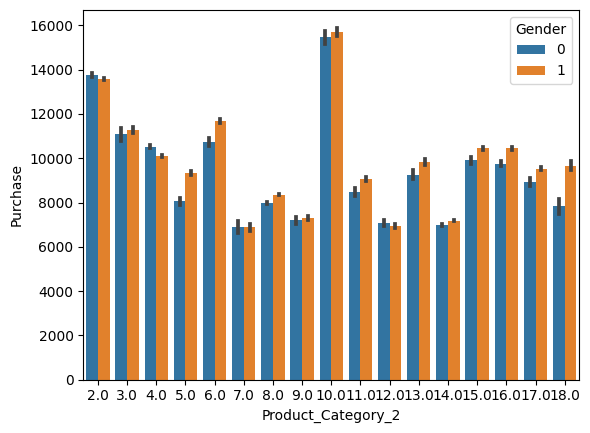

In [37]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

In product category 2 most of the categories show similiar trend but a single category stays on top and is purchased the most whereas the other categories stand inline with others.However the difference is not uneven as the product category 1.

/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtyp

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

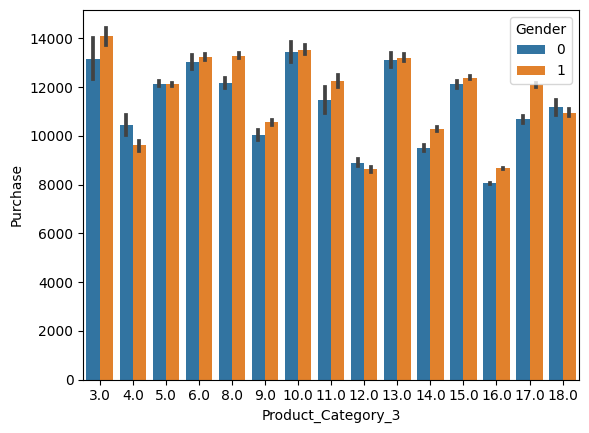

In [38]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In product category 3 , there is no much difference. All the categories have have purchase rate of above 8000

Final conclusion: Even though, product category 1 shows a strong non uniform distribution it has the highest purchase of 20,000 where as the rest to category stays at 16,000 and 14,000. Hence the most purchases are in the product_category 1.

In [39]:
df_merge.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


we can also drop Product_ID as it does not make any difference and may not be needed for the model.

## Key Takeaways
1. The purchases for male category is higher than for female category over all the age groups.It shows A Purchase trend which is a uniform distribution accross the ages.
2. The graph shows a uniform distribution across the occupation. so both age and occupation does not have much effect on the dataset.
3. product category 1 shows a strong uneven distribution as some categories have very low purchase percent.
4. In product category 2 most of the categories show similiar trend but a single category stays on top and is purchased the most whereas the other categories stand inline with others.However the difference is not uneven as the product category 1.
5. In product category 3 , there is no much difference. All the categories have have purchase rate of above 8000.
6.  Even though, product category 1 shows a strong non uniform distribution it has the highest purchase of 20,000 where as the rest to category stays at 16,000 and 14,000. Hence the most purchases are in the product_category 1.

## Recommendations
1. There is a requirement to attract more female customers, so plans must be made to attract more female customers.Female centered campaign can be considered.
2. It is important to look over the categories that have low purchases specially in category 1 where only one product has the highest purchases and stays on top in comparison to other categories.It is important to look into the categories with low purchases.


## Feature Scaling

In [40]:
df_test_data = df_merge[df_merge['Purchase'].isnull()]

In [41]:
df_test_data.shape

(233599, 11)

In [42]:
df_train_data = df_merge[~df_merge['Purchase'].isnull()]

In [43]:
df_train_data.shape

(550068, 11)

In [44]:
X=df_train_data.drop('Purchase',axis=1)

In [45]:
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,0,1,10,1,2,0,3,8.0,16.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0


In [46]:
y = df_train_data['Purchase']

In [47]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [48]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [49]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [50]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [52]:
# Create a Linear Regression model
model = LinearRegression()

# Perform k-fold cross-validation to find the best model
k = 100
scores = cross_val_score(model, X_train, y_train, cv=k, scoring='r2')
best_r2 = np.max(scores)
best_model_index = np.argmax(best_r2)

# Fit the best model on the entire training data
best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate R-squared on the test data
r2 = best_model.score(X_test, y_test)

print("Best R-squared from cross-validation:", best_r2)
print("R-squared on test data using the best model:", r2)


Best R-squared from cross-validation: 0.16206763490026488
R-squared on test data using the best model: 0.12922937601186235


In [53]:
# Calculate the squared errors
Squared_errrors = (y_pred - y_test) **2

mse =  np.mean(Squared_errrors)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4684.620944310731
